# API para hacer predicciones, consulta la API de features. 

### Para el desarrollo de esta API se implementó un micro servicio de Flask.

In [4]:
from flask import Flask, request, jsonify
from joblib import dump, load
import requests
import json

#### Cargo el modelo en memoria antes de invocar a la API.

In [5]:
model = load('model/model_risk.joblib')

#### En el cuerpo de la API invoco a la API de features para obtener los datos que irán al modelo dad un id.

In [6]:
app = Flask(__name__)

@app.route('/predictions', methods=['GET', 'POST'])
def predictions():
    if request.method == 'GET':
        return "Intente con un método Post e incorpore el id"
    else:
        request_data = request.get_json()
        itemId = request_data['id']
        
        data = json.dumps({"id": itemId})

        response_post = requests.post(
            "http://10.3.0.4:60004/features",
            data,
            headers={"Content-Type": "application/json"}
        )
        if response_post.status_code == 200:
            json_response = response_post.json()
            
        list_to_predict = [
                           json_response["age"],
                           json_response["years_on_the_job"],
                           json_response["nb_previous_loans"],
                           json_response["avg_amount_loans_previous"],
                           json_response["flag_own_car"]
                          ]

        return {"prediction": str(model.predict([list_to_predict])[0])}
        
app.run(debug=False, host='10.3.0.4', port='60003')

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://10.3.0.4:60003/ (Press CTRL+C to quit)
192.168.7.2 - - [31/Jan/2022 18:17:18] "POST /predictions HTTP/1.1" 200 -


#### Acá una muestra:

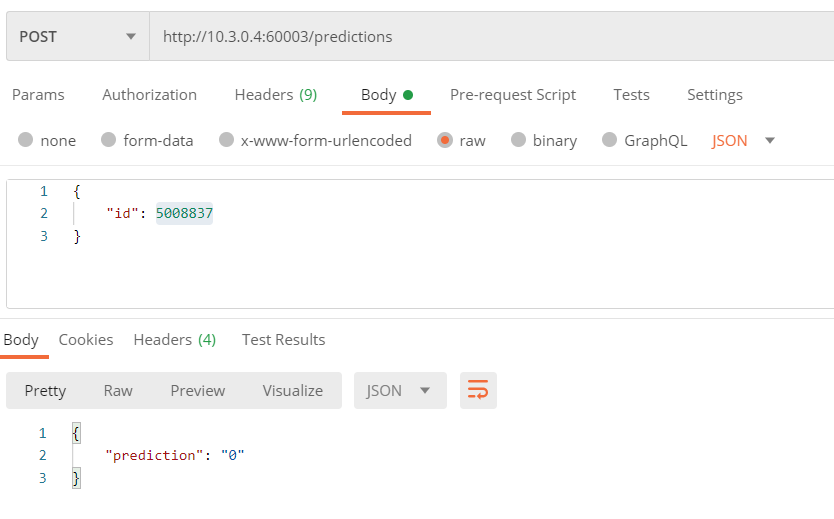

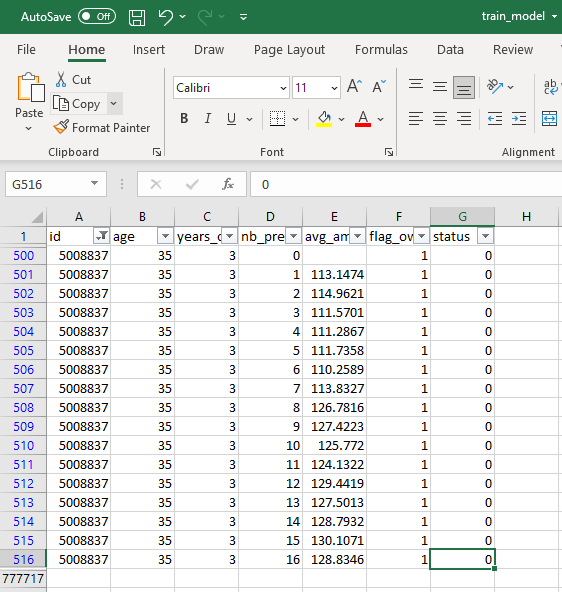